
## Task 1 : Prediction using Supervised Machine Learning
## GRIP @ The Sparks Foundation


Author - Mohamedayaz Asrafhusen Shaikh



In [1]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  


## Reading data and printing dataframe

In [2]:
# Reading data from link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Visualization

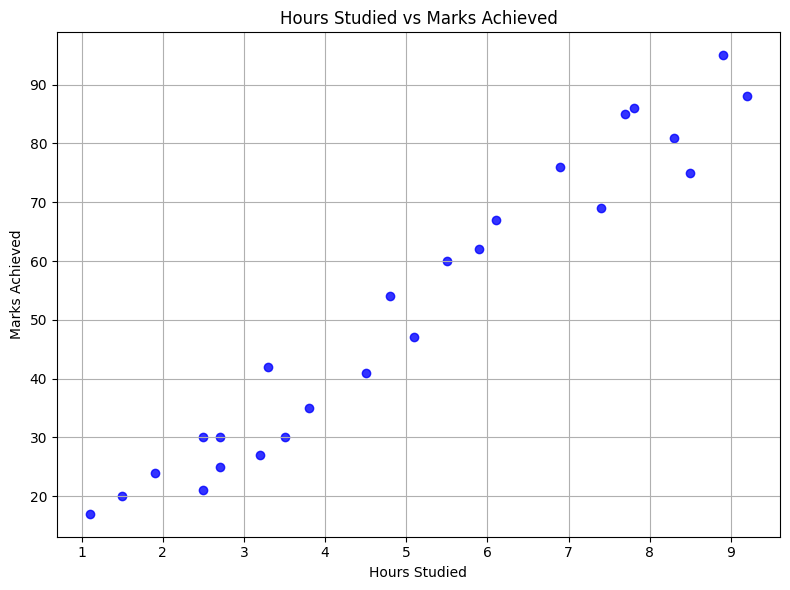

In [4]:

import matplotlib.pyplot as plt

# Assuming 'data' contains your hours studied and marks achieved data
hours_studied = data['Hours']
marks_achieved = data['Scores']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(hours_studied, marks_achieved, color='blue', alpha=0.8)

# Adding labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Marks Achieved')
plt.title('Hours Studied vs Marks Achieved')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


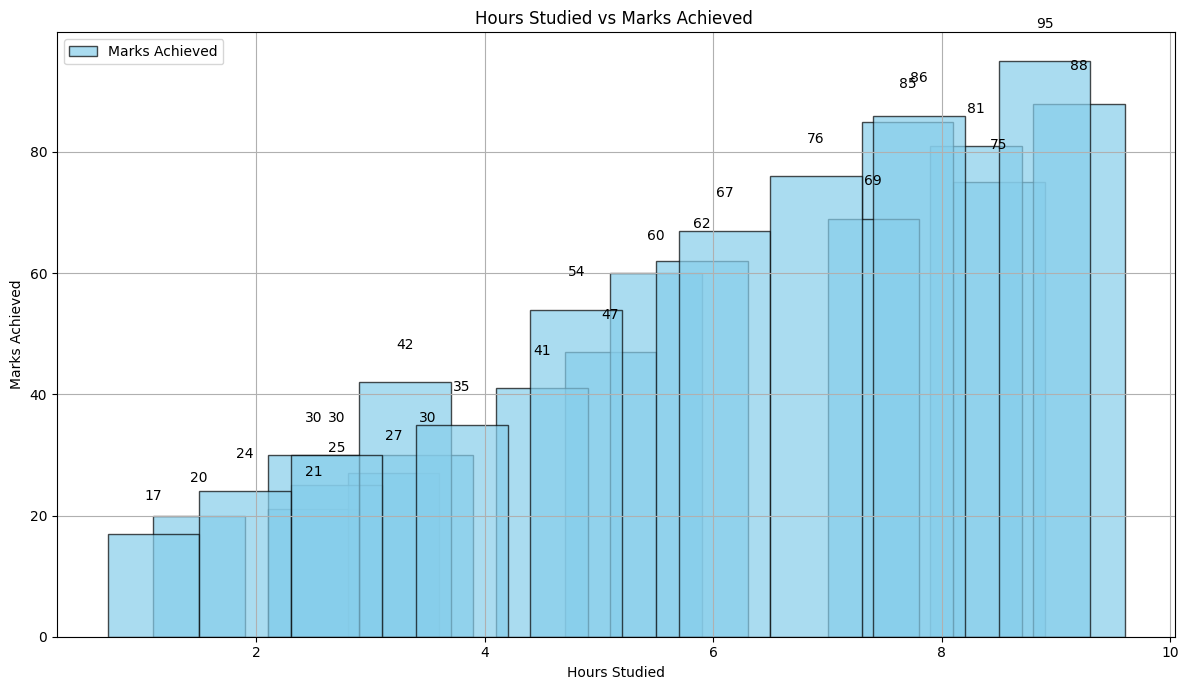

In [5]:
# Bar Plot with Labels and Styling
plt.figure(figsize=(12, 7))
bars = plt.bar(hours_studied, marks_achieved, color='skyblue', edgecolor='black', alpha=0.7, label='Marks Achieved')

# Adding labels, title, and annotations
plt.xlabel('Hours Studied')
plt.ylabel('Marks Achieved')
plt.title('Hours Studied vs Marks Achieved ')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

# Add a legend, grid, and tight layout
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


## Data Preprocessing

In [6]:
X = data.iloc[:, :-1].values    

In [7]:
y = data.iloc[:, 1].values

## Model Training
Splitting the data into training and testing sets, and training the algorithm.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Model Trained")

Model Trained


## Plotting the Line of regression 

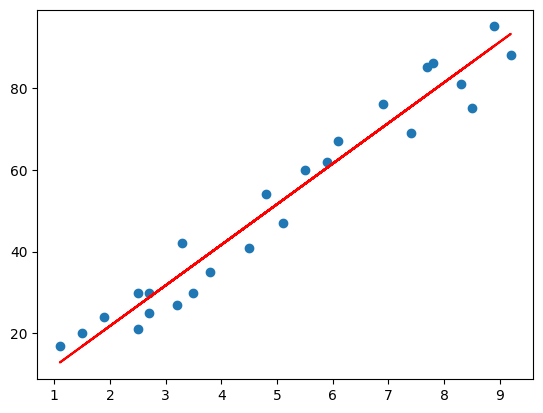

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

## Making Predictions

Mkae predictions using the trained algorithm

In [10]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual result vs Predicted Model result


In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


In [13]:
# Testing the model at 9.25 hours
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


## Evaluation Metrics
Evaluate the performance of algorithm to see how well different algorithms perform on a particular dataset.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


## Conclusion 

A student that will study for 9.25 hours will have a predicted score of 93.69